In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

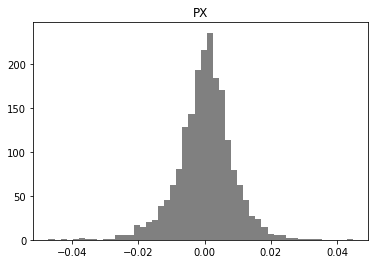

In [17]:
# load the data
index = 'PX'
path_to_dataset = f'{index}.csv'
data = pd.read_csv(path_to_dataset, index_col = 'Date')
data.index = pd.to_datetime(data.index)
data.sort_values(by = ['Date'], inplace=True, ascending=True)

#obtaining log returns
data['log_return'] = np.log(1 + data['Close'].pct_change())
data = data[1:]
plt.hist(data['log_return'], color = 'grey', bins = 50)
plt.title(index)
plt.show()

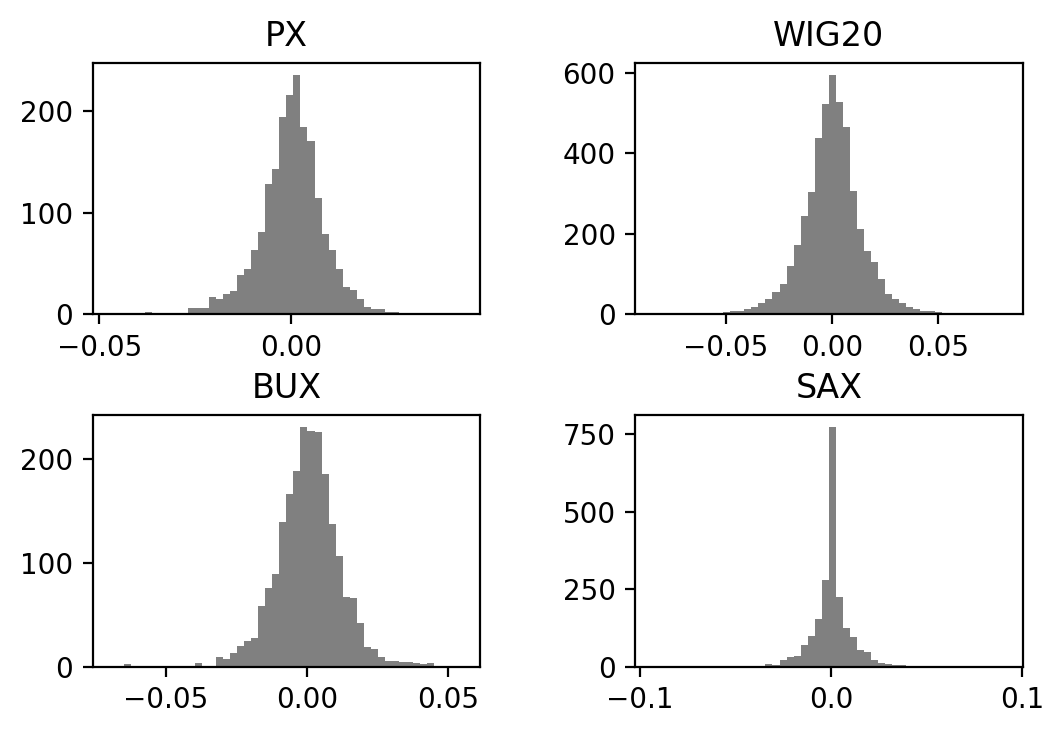

In [14]:
fig, axs = plt.subplots(2, 2, dpi = 200)

for index, ax in zip({'PX', 'WIG20', 'BUX', 'SAX'}, axs.flatten()):
    # load data
    path_to_dataset = f'{index}.csv'
    data = pd.read_csv(path_to_dataset, index_col = 'Date')
    data.index = pd.to_datetime(data.index)
    data.sort_values(by = ['Date'], inplace=True, ascending=True)

    # obtaining log returns
    data['log_return'] = np.log(1 + data['Close'].pct_change())
    data = data[1:]
    
    # make histogram
    ax.hist(data['log_return'], color = 'grey', bins = 50)
#     ax.set_yscale('log')
    ax.title.set_text(index)
# set up appropriate distance between figures
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
# save image
fig.savefig('hists.png', bbox_inches='tight')

In [67]:
stats = pd.DataFrame()
colnames = []
for index in {'PX', 'WIG20', 'BUX', 'SAX'}:
    # get data from csv
    path_to_dataset = f'{index}.csv'
    data = pd.read_csv(path_to_dataset, index_col = 'Date')
    data.index = pd.to_datetime(data.index)
    data.sort_values(by = ['Date'], inplace=True, ascending=True)

    # obtaining log returns
    data['log_return'] = np.log(1 + data['Close'].pct_change())
    data = data[1:]
    
    # obtain descriptive stats in appropriate formats
    length = int(len(data['log_return']))
    mean = '{:.6f}'.format(data['log_return'].mean())
    maximum = '{:.4f}'.format(data['log_return'].max())
    minimum = '{:.4f}'.format(data['log_return'].min())
    std = '{:.4f}'.format(data['log_return'].std())
    skewness = '{:.3f}'.format(scipy.stats.skew(data['log_return']))
    kurtosis = '{:.3f}'.format(scipy.stats.kurtosis(data['log_return']))
    stats = pd.concat(
        [
            stats,
            pd.Series([length, mean, maximum, minimum, std, skewness, kurtosis])
        ],
        axis = 1
    )
    colnames.append(index)
stats.columns = colnames
stats.index = ['sample size', 'mean', 'maximum', 'minimum', 'std', 'skewness', 'kurtosis']
stats

,PX,WIG20,BUX,SAX
sample size,1995,4718,2192,2089
mean,0.000119,0.000073,0.000312,0.000202
maximum,0.0447,0.0815,0.0551,0.0912
minimum,-0.0471,-0.0844,-0.0698,-0.0933
std,0.0085,0.0142,0.0115,0.0104
skewness,-0.347,-0.153,-0.232,-0.076
kurtosis,2.510,2.814,2.943,9.026


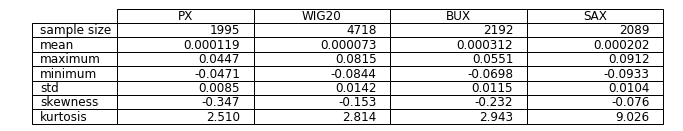

In [72]:
# create table from dataframe
fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame
tabla = pd.plotting.table(ax, stats, loc='upper right', colWidths=[0.17]*len(stats.columns)
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2) # change size table
plt.savefig('stats_table.png', transparent=True) # save table
plt.show()